In [64]:
# Install prophet library
!pip install prophet

In [65]:
#import requirements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
#Create bins for game splits
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [66]:
#Read in CSV data files
braun_df = pd.read_csv('./resources/nuggets stats/braun.csv')
pope_df = pd.read_csv('./resources/nuggets stats/caldwell-pope.csv')
gordon_df = pd.read_csv('./resources/nuggets stats/gordon.csv')
holiday_df = pd.read_csv('./resources/nuggets stats/holiday.csv')
jokic_df = pd.read_csv('./resources/nuggets stats/jokic.csv')
murray_df = pd.read_csv('./resources/nuggets stats/murray.csv')
porterjr_df = pd.read_csv('./resources/nuggets stats/porterjr.csv')
watson_df = pd.read_csv('./resources/nuggets stats/watson.csv')
conley_df = pd.read_csv('./resources/timberwolves stats/conley.csv')
edwards_df = pd.read_csv('./resources/timberwolves stats/edwards.csv')
gobert_df = pd.read_csv('./resources/timberwolves stats/gobert.csv')
kat_df = pd.read_csv('./resources/timberwolves stats/KAT.csv')
mcdaniels_df = pd.read_csv('./resources/timberwolves stats/mcdaniels.csv')
morris_df = pd.read_csv('./resources/timberwolves stats/morris.csv')
reid_df = pd.read_csv('./resources/timberwolves stats/reid.csv')
walker_df = pd.read_csv('./resources/timberwolves stats/walker.csv')
wolves_schedule = pd.read_csv('./resources/schedules/wolves schedule.csv',parse_dates=True)
nuggets_schedule = pd.read_csv('./resources/schedules/nuggets schedule.csv',parse_dates=True)

In [67]:

wolves_schedule = wolves_schedule[['date']].copy()
wolves_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
wolves_schedule.info()
nuggets_schedule = wolves_schedule[['date']].copy()
nuggets_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
nuggets_schedule.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes


In [68]:
#combine game dates to player stats dataframe for nuggets
braun_df = pd.concat([nuggets_schedule, braun_df], axis=1) 
pope_df = pd.concat([nuggets_schedule, pope_df], axis=1)
gordon_df = pd.concat([nuggets_schedule, gordon_df], axis=1)
holiday_df = pd.concat([nuggets_schedule, holiday_df], axis=1)
jokic_df = pd.concat([nuggets_schedule, jokic_df], axis=1)
murray_df = pd.concat([nuggets_schedule, murray_df], axis=1)
porterjr_df = pd.concat([nuggets_schedule, porterjr_df], axis=1)
watson_df = pd.concat([nuggets_schedule, watson_df], axis=1)

#combine game dates to player stats dataframe for timberwolves
conley_df = pd.concat([wolves_schedule, conley_df], axis=1)
edwards_df = pd.concat([wolves_schedule, edwards_df], axis=1)
gobert_df = pd.concat([wolves_schedule, gobert_df], axis=1)
kat_df = pd.concat([wolves_schedule, kat_df], axis=1)
mcdaniels_df = pd.concat([wolves_schedule, mcdaniels_df], axis=1)
morris_df = pd.concat([wolves_schedule, morris_df], axis=1)
reid_df = pd.concat([wolves_schedule, reid_df], axis=1)
walker_df = pd.concat([wolves_schedule, walker_df], axis=1)

kat_df

,date,points,pos,min,fgm,fga,fgp,ftm,fta,ftp,...,comment,player.id,player.firstname,player.lastname,team.id,team.name,team.nickname,team.code,team.logo,game.id
0,2023-10-07 16:00:00,14.0,C,18.0,4.0,9.0,44.4,5.0,5.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12478.0
1,2023-10-14 23:30:00,17.0,C,27.0,6.0,14.0,42.9,1.0,2.0,50.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12511.0
2,2023-10-18 00:00:00,19.0,C,36.0,8.0,25.0,32.0,1.0,1.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12557.0
3,2023-10-20 00:00:00,12.0,C,31.0,5.0,12.0,41.7,1.0,2.0,50.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12581.0
4,2023-10-25 23:30:00,16.0,C,36.0,7.0,17.0,41.2,1.0,1.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2024-05-11 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2024-05-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2024-05-15 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2024-05-17 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
def build_player_forecast(player_df):
    player_impact = player_df[['date','plusMinus']]
    player_impact = player_impact.rename(columns={'date':'ds','plusMinus':'y'})
    player_model = Prophet()
    player_model.fit(player_impact)
    player_future = player_model.make_future_dataframe(periods=3, freq='D')
    player_forecast = player_model.predict(player_future)
    return player_forecast

21:15:29 - cmdstanpy - INFO - Chain [1] start processing
21:15:29 - cmdstanpy - INFO - Chain [1] done processing
21:15:30 - cmdstanpy - INFO - Chain [1] start processing
21:15:30 - cmdstanpy - INFO - Chain [1] done processing
21:15:30 - cmdstanpy - INFO - Chain [1] start processing
21:15:30 - cmdstanpy - INFO - Chain [1] done processing
21:15:30 - cmdstanpy - INFO - Chain [1] start processing
21:15:30 - cmdstanpy - INFO - Chain [1] done processing
21:15:30 - cmdstanpy - INFO - Chain [1] start processing
21:15:31 - cmdstanpy - INFO - Chain [1] done processing
21:15:31 - cmdstanpy - INFO - Chain [1] start processing
21:15:31 - cmdstanpy - INFO - Chain [1] done processing
21:15:31 - cmdstanpy - INFO - Chain [1] start processing
21:15:31 - cmdstanpy - INFO - Chain [1] done processing
21:15:31 - cmdstanpy - INFO - Chain [1] start processing
21:15:32 - cmdstanpy - INFO - Chain [1] done processing


<Axes: title={'center': 'Watson Impact forecast Trend'}>

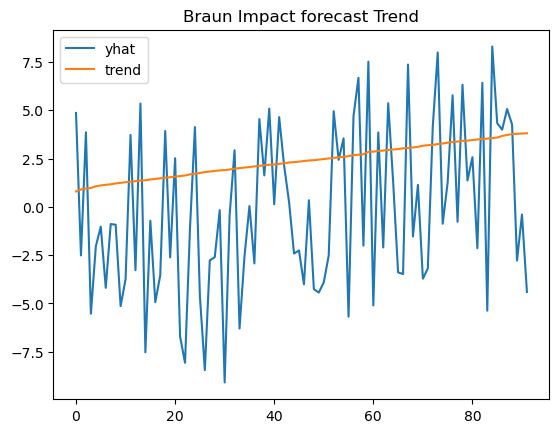

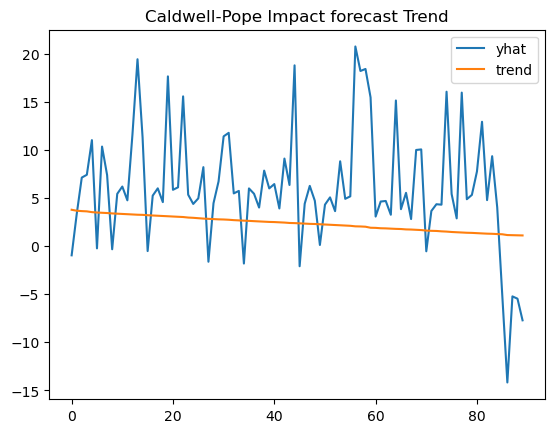

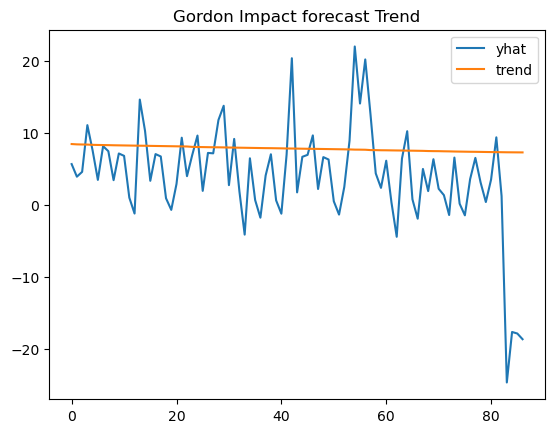

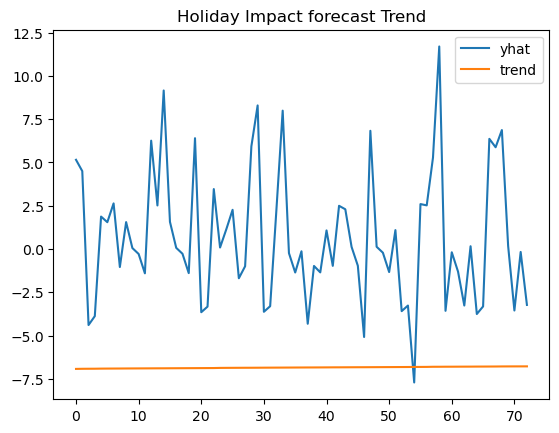

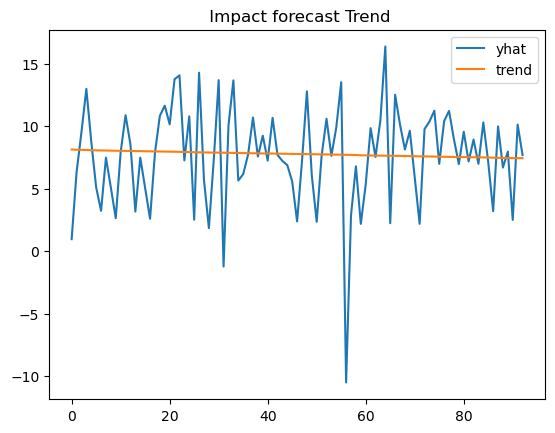

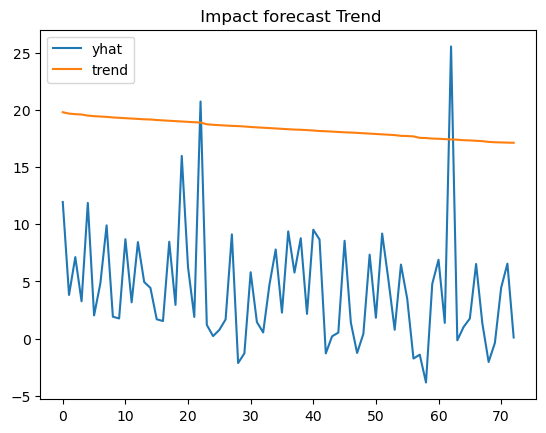

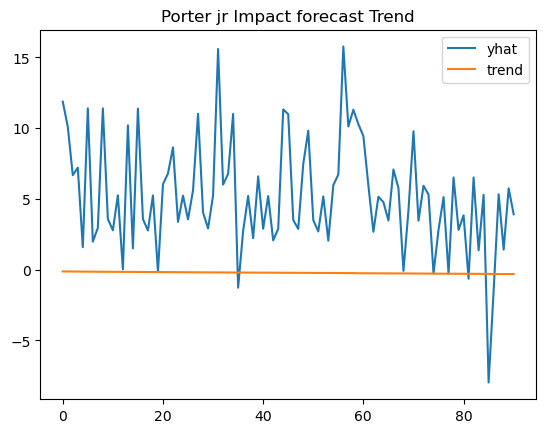

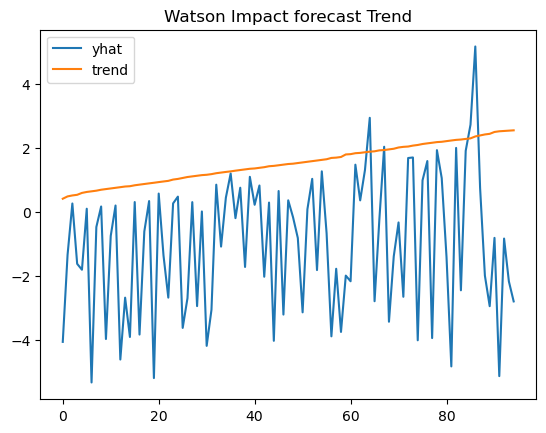

In [70]:
#nuggets player impact(as determined by plus/minus), and date, renamed to prophet syntax
braun_forecast = build_player_forecast(braun_df)
braun_forecast[['yhat','trend']].plot(legend='Braun impact trend',title='Braun Impact forecast Trend')

pope_forecast = build_player_forecast(pope_df)
pope_forecast[['yhat','trend']].plot(legend='Caldwell-Pope impact trend',title='Caldwell-Pope Impact forecast Trend')

gordon_forecast = build_player_forecast(gordon_df)
gordon_forecast[['yhat','trend']].plot(legend='Gordon impact trend',title='Gordon Impact forecast Trend')

holiday_forecast = build_player_forecast(holiday_df)
holiday_forecast[['yhat','trend']].plot(legend='Holiday impact trend',title='Holiday Impact forecast Trend')

jokic_forecast = build_player_forecast(jokic_df)
jokic_forecast[['yhat','trend']].plot(legend=' impact trend',title=' Impact forecast Trend')

murray_forecast = build_player_forecast(murray_df)
murray_forecast[['yhat','trend']].plot(legend=' impact trend',title=' Impact forecast Trend')

porterjr_forecast = build_player_forecast(porterjr_df)
porterjr_forecast[['yhat','trend']].plot(legend='Porter jr impact trend',title='Porter jr Impact forecast Trend')

watson_forecast = build_player_forecast(watson_df)
watson_forecast[['yhat','trend']].plot(legend='Watson impact trend',title='Watson Impact forecast Trend')

21:15:34 - cmdstanpy - INFO - Chain [1] start processing
21:15:34 - cmdstanpy - INFO - Chain [1] done processing
21:15:34 - cmdstanpy - INFO - Chain [1] start processing
21:15:34 - cmdstanpy - INFO - Chain [1] done processing
21:15:35 - cmdstanpy - INFO - Chain [1] start processing
21:15:35 - cmdstanpy - INFO - Chain [1] done processing
21:15:35 - cmdstanpy - INFO - Chain [1] start processing
21:15:35 - cmdstanpy - INFO - Chain [1] done processing
21:15:35 - cmdstanpy - INFO - Chain [1] start processing
21:15:35 - cmdstanpy - INFO - Chain [1] done processing
21:15:36 - cmdstanpy - INFO - Chain [1] start processing
21:15:36 - cmdstanpy - INFO - Chain [1] done processing
21:15:36 - cmdstanpy - INFO - Chain [1] start processing
21:15:36 - cmdstanpy - INFO - Chain [1] done processing
21:15:36 - cmdstanpy - INFO - Chain [1] start processing
21:15:36 - cmdstanpy - INFO - Chain [1] done processing


<Axes: title={'center': 'Walker Impact forecast Trend'}>

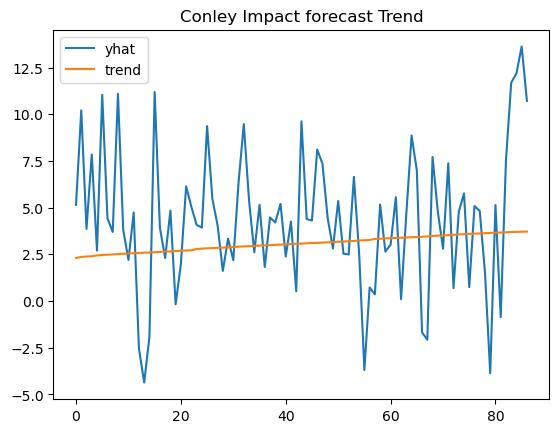

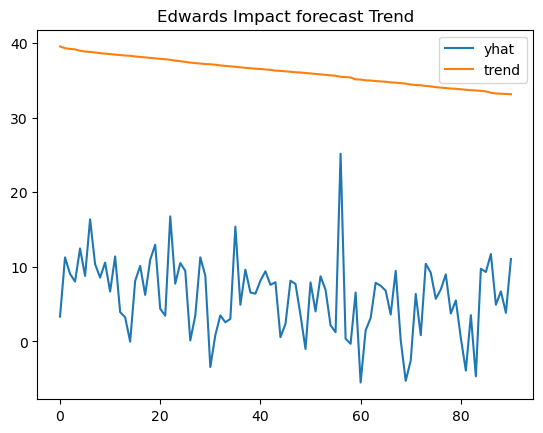

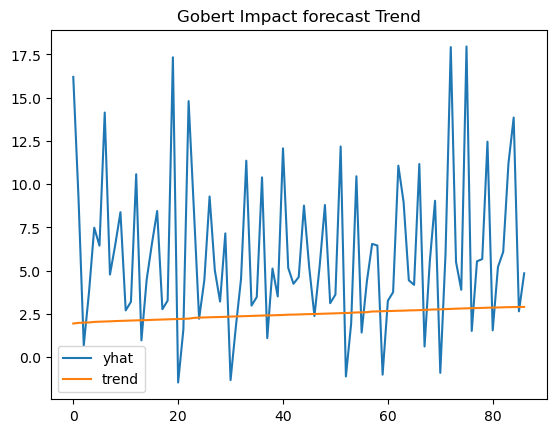

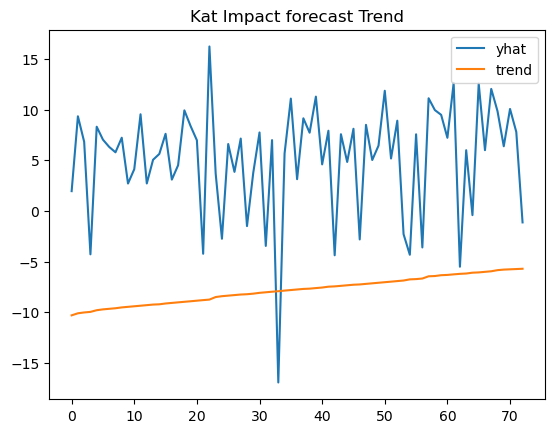

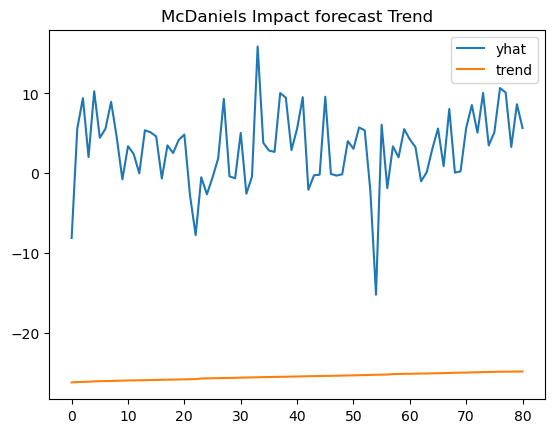

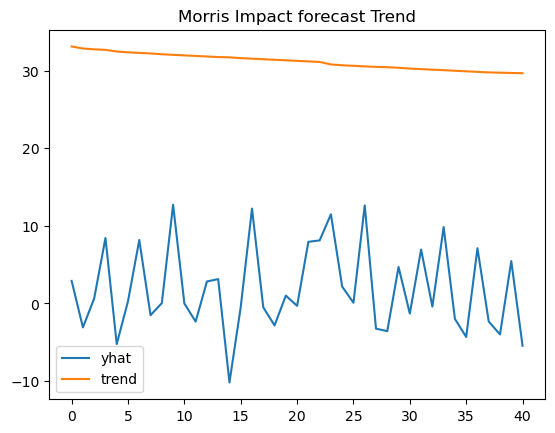

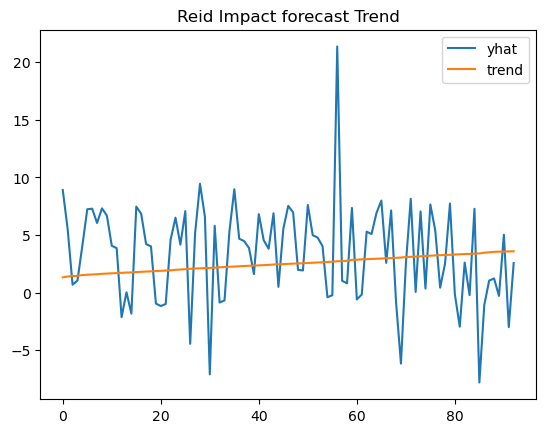

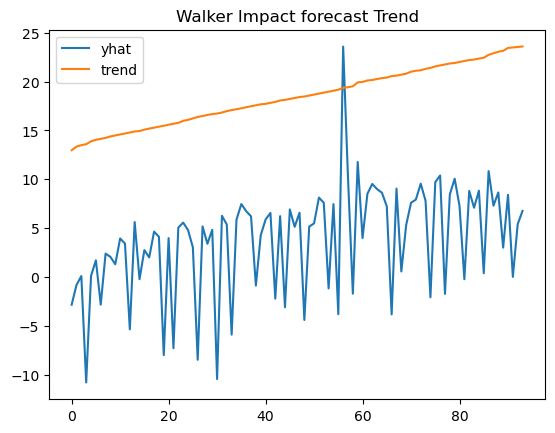

In [71]:
#timberwolves player impact(as determined by plus/minus), and date, renamed to prophet syntax
conley_forecast = build_player_forecast(conley_df)
conley_forecast[['yhat','trend']].plot(legend='Conley impact trend',title='Conley Impact forecast Trend')

edwards_forecast = build_player_forecast(edwards_df)
edwards_forecast[['yhat','trend']].plot(legend='Edwards impact trend',title='Edwards Impact forecast Trend')

gobert_forecast = build_player_forecast(gobert_df)
gobert_forecast[['yhat','trend']].plot(legend='Gobert impact trend',title='Gobert Impact forecast Trend')

kat_forecast = build_player_forecast(kat_df)
kat_forecast[['yhat','trend']].plot(legend='Kat impact trend',title='Kat Impact forecast Trend')

mcdaniels_forecast = build_player_forecast(mcdaniels_df)
mcdaniels_forecast[['yhat','trend']].plot(legend='McDaniels impact trend',title='McDaniels Impact forecast Trend')

morris_forecast = build_player_forecast(morris_df)
morris_forecast[['yhat','trend']].plot(legend='Morris impact trend',title='Morris Impact forecast Trend')

reid_forecast = build_player_forecast(reid_df)
reid_forecast[['yhat','trend']].plot(legend='Reid impact trend',title='Reid Impact forecast Trend')

walker_forecast = build_player_forecast(walker_df)
walker_forecast[['yhat','trend']].plot(legend='Walker impact trend',title='Walker Impact forecast Trend')

,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",7.400,19.100,43.930,15.8300,4.200,2.100,1.60,0.500,0.20,0.20
1,"(10, 20]",10.800,22.900,44.660,46.0000,4.300,1.900,1.70,0.300,0.20,-0.20
2,"(20, 30]",7.500,18.400,43.300,24.0000,3.000,1.200,1.80,0.400,0.60,-4.10
3,"(30, 40]",5.600,17.900,38.000,29.1600,2.800,1.100,1.20,0.400,0.40,-3.00
4,"(40, 50]",3.700,16.000,28.370,11.6700,3.300,0.700,1.20,0.300,0.30,-1.50
5,"(50, 60]",5.900,21.200,36.230,31.6700,3.700,1.200,1.80,0.900,0.70,-1.30
6,"(60, 70]",8.500,20.200,67.310,46.6600,3.800,1.800,2.40,0.700,0.50,3.10
7,"(70, 80]",8.200,25.500,45.090,43.3300,4.200,2.500,1.70,0.500,0.50,5.90
8,"(80, 90]",5.875,15.125,34.425,16.6625,3.125,0.875,1.25,0.375,0.25,-0.25


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",7.400,19.100,43.930,15.8300,4.200,2.100,1.60,0.500,0.20,0.20
1,"(10, 20]",10.800,22.900,44.660,46.0000,4.300,1.900,1.70,0.300,0.20,-0.20
2,"(20, 30]",7.500,18.400,43.300,24.0000,3.000,1.200,1.80,0.400,0.60,-4.10
3,"(30, 40]",5.600,17.900,38.000,29.1600,2.800,1.100,1.20,0.400,0.40,-3.00
4,"(40, 50]",3.700,16.000,28.370,11.6700,3.300,0.700,1.20,0.300,0.30,-1.50
5,"(50, 60]",5.900,21.200,36.230,31.6700,3.700,1.200,1.80,0.900,0.70,-1.30
6,"(60, 70]",8.500,20.200,67.310,46.6600,3.800,1.800,2.40,0.700,0.50,3.10
7,"(70, 80]",8.200,25.500,45.090,43.3300,4.200,2.500,1.70,0.500,0.50,5.90
8,"(80, 90]",5.875,15.125,34.425,16.6625,3.125,0.875,1.25,0.375,0.25,-0.25


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",12.4,27.900000,57.440000,11.660000,5.200000,3.100000,1.800000,1.100000,1.000000,9.700000
1,"(10, 20]",13.5,36.500000,45.410000,21.660000,8.100000,3.900000,1.800000,0.800000,0.700000,-0.500000
2,"(20, 30]",13.7,28.900000,57.060000,11.670000,5.900000,2.900000,1.200000,0.800000,0.200000,8.300000
3,"(30, 40]",14.5,32.600000,62.740000,32.500000,6.600000,2.500000,2.200000,0.400000,0.300000,6.100000
4,"(40, 50]",12.9,30.500000,55.490000,30.000000,5.700000,2.800000,2.200000,0.600000,1.200000,0.100000
5,"(50, 60]",15.5,30.700000,59.940000,15.830000,6.800000,3.500000,1.900000,1.200000,0.500000,8.600000
6,"(60, 70]",13.8,31.400000,64.980000,15.830000,6.300000,4.400000,2.200000,0.300000,0.400000,5.300000
7,"(70, 80]",14.4,33.600000,56.830000,18.330000,7.100000,5.100000,1.900000,0.700000,0.400000,7.800000
8,"(80, 90]",12.0,37.333333,55.566667,36.666667,6.666667,4.666667,2.666667,1.333333,0.333333,-17.666667


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",2.900000,12.0,28.34,29.170000,1.000000,0.800000,1.000000,0.400000,0.1,-0.6
1,"(10, 20]",6.400000,21.9,52.63,37.840000,1.900000,1.900000,1.800000,1.100000,0.0,6.5
2,"(20, 30]",1.500000,8.2,14.33,10.000000,0.600000,0.500000,0.900000,0.400000,0.1,-2.5
3,"(30, 40]",4.000000,17.2,36.50,21.000000,1.300000,0.900000,1.600000,0.800000,0.2,-4.7
4,"(40, 50]",4.500000,15.5,41.37,32.670000,1.300000,1.900000,1.300000,0.300000,0.3,2.3
5,"(50, 60]",4.700000,16.4,47.29,43.330000,1.300000,0.900000,0.800000,0.800000,0.3,3.9
6,"(60, 70]",3.333333,12.0,21.80,24.066667,1.444444,0.777778,0.888889,0.777778,0.0,0.0
7,"(70, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",24.900000,30.4,65.990000,45.160000,11.800000,7.200000,2.300000,1.000000,0.700000,10.3
1,"(10, 20]",29.800000,33.8,53.530000,23.270000,13.800000,9.600000,2.700000,1.400000,0.800000,2.5
2,"(20, 30]",22.100000,32.4,49.910000,30.360000,10.600000,10.400000,2.700000,1.300000,0.700000,9.1
3,"(30, 40]",23.100000,33.7,70.960000,46.000000,10.500000,8.700000,2.800000,1.100000,1.500000,12.6
4,"(40, 50]",29.300000,34.8,67.010000,35.840000,13.200000,8.100000,2.400000,1.100000,0.800000,2.0
5,"(50, 60]",24.300000,34.4,59.440000,37.320000,13.200000,10.700000,2.600000,1.600000,0.900000,10.2
6,"(60, 70]",26.500000,37.6,57.780000,21.870000,12.000000,7.000000,1.800000,1.300000,0.900000,7.8
7,"(70, 80]",30.500000,36.5,57.730000,44.090000,13.300000,9.100000,2.300000,1.800000,0.600000,13.8
8,"(80, 90]",25.111111,39.0,57.011111,23.944444,14.111111,9.222222,2.888889,1.666667,0.333333,1.0


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",14.900000,28.500000,43.350000,34.230000,2.500000,6.900000,1.500000,0.600000,0.600000,2.300000
1,"(10, 20]",21.400000,28.600000,48.270000,47.470000,4.900000,4.800000,1.900000,1.000000,0.900000,9.500000
2,"(20, 30]",22.900000,31.800000,50.290000,35.820000,3.200000,7.200000,2.600000,1.300000,0.500000,4.600000
3,"(30, 40]",21.900000,36.000000,44.780000,39.370000,4.800000,7.200000,1.500000,0.400000,0.800000,1.600000
4,"(40, 50]",19.800000,31.100000,47.190000,41.720000,4.100000,6.200000,1.200000,1.100000,0.300000,3.600000
5,"(50, 60]",22.000000,31.800000,48.690000,48.840000,4.300000,7.000000,1.700000,1.600000,0.800000,8.400000
6,"(60, 70]",22.111111,35.888889,40.222222,27.722222,5.333333,5.555556,1.888889,0.444444,0.777778,-0.111111
7,"(70, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",16.700000,30.100000,45.310000,35.620000,7.500000,1.600000,2.500000,0.300000,1.000000,7.800000
1,"(10, 20]",18.700000,33.200000,48.120000,36.520000,8.200000,1.900000,2.200000,0.600000,0.700000,-0.300000
2,"(20, 30]",14.400000,30.800000,47.580000,44.780000,6.700000,1.100000,1.400000,0.400000,0.600000,9.300000
3,"(30, 40]",15.900000,30.800000,49.900000,42.170000,5.800000,1.300000,1.700000,0.400000,0.900000,12.300000
4,"(40, 50]",13.500000,32.600000,43.090000,30.110000,6.100000,0.900000,2.000000,0.400000,0.600000,-0.800000
5,"(50, 60]",21.100000,34.200000,51.700000,42.690000,8.100000,2.000000,1.700000,0.700000,0.600000,4.700000
6,"(60, 70]",18.500000,30.500000,56.120000,46.040000,6.000000,1.600000,1.500000,0.600000,0.400000,6.200000
7,"(70, 80]",15.600000,31.500000,43.260000,35.970000,6.900000,1.600000,1.700000,0.600000,0.500000,6.600000
8,"(80, 90]",20.428571,39.428571,51.571429,45.057143,7.571429,1.285714,1.285714,1.428571,0.571429,-0.857143


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",6.6,19.0,44.78,18.33,2.5,1.0,1.4,0.6,1.0,-1.9
1,"(10, 20]",2.5,12.8,46.66,0.00,1.5,0.9,1.1,0.5,0.8,-2.4
2,"(20, 30]",8.3,21.2,49.82,20.67,3.6,1.6,2.3,0.7,0.8,2.2
3,"(30, 40]",10.7,20.5,52.95,40.67,3.3,0.8,1.9,0.5,0.6,-1.9
4,"(40, 50]",5.6,17.7,37.22,18.67,2.7,1.2,1.4,0.5,1.1,-1.4
5,"(50, 60]",7.4,20.6,47.49,50.83,4.0,0.9,2.2,0.7,1.2,-0.7
6,"(60, 70]",6.6,19.2,42.90,22.50,3.0,1.0,1.4,0.6,1.1,-0.2
7,"(70, 80]",5.5,18.1,37.44,3.33,4.2,1.0,2.3,0.3,1.5,-1.1
8,"(80, 90]",4.2,15.9,39.58,25.00,2.9,1.2,1.6,0.2,1.3,-0.2


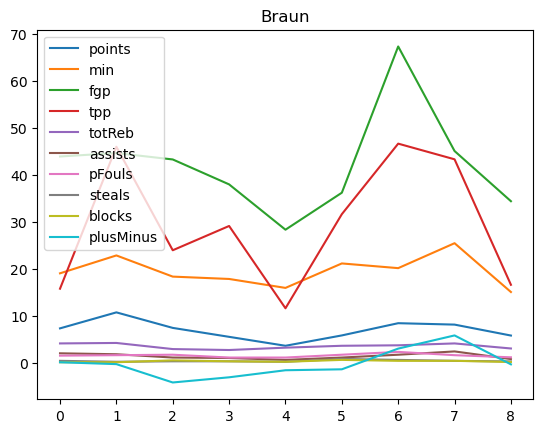

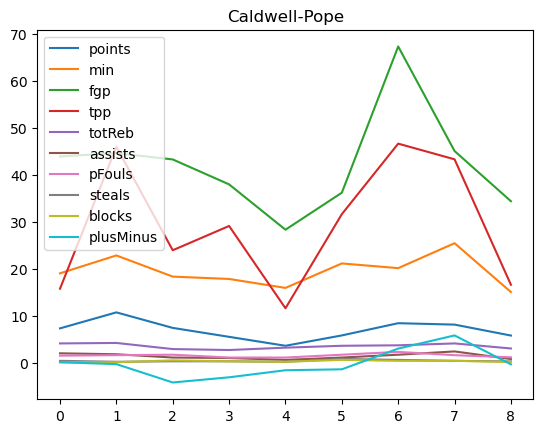

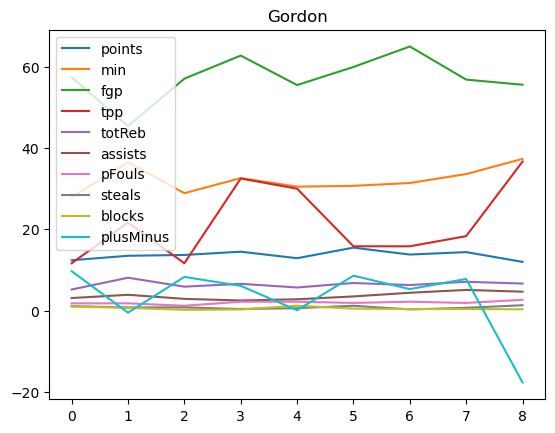

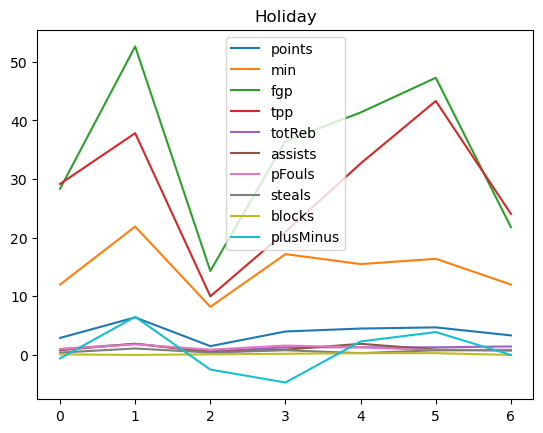

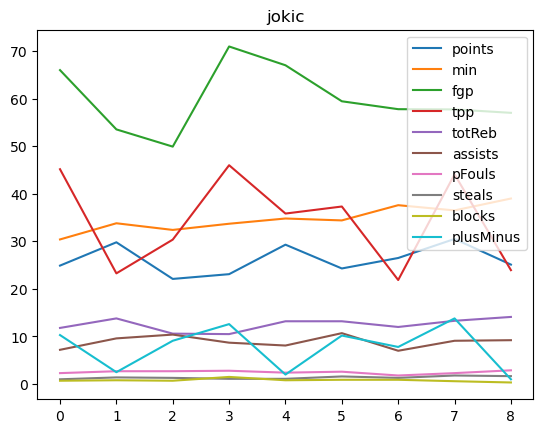

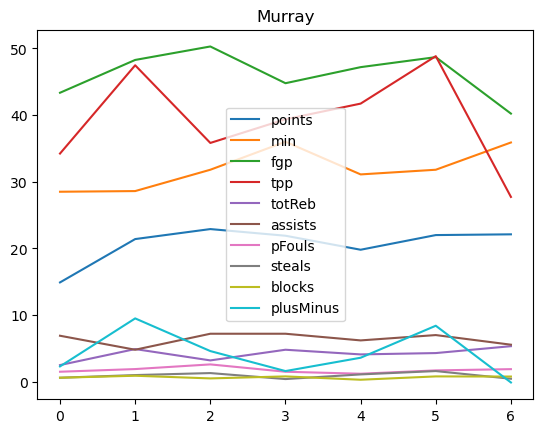

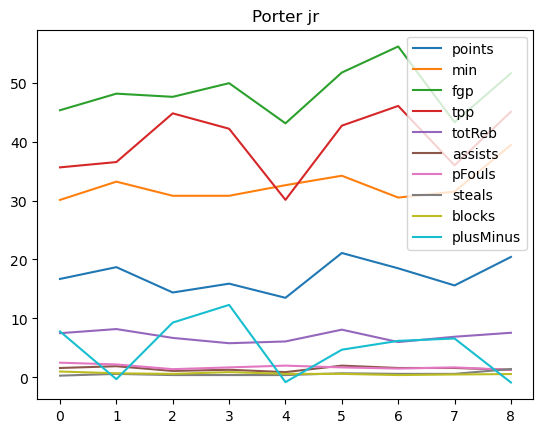

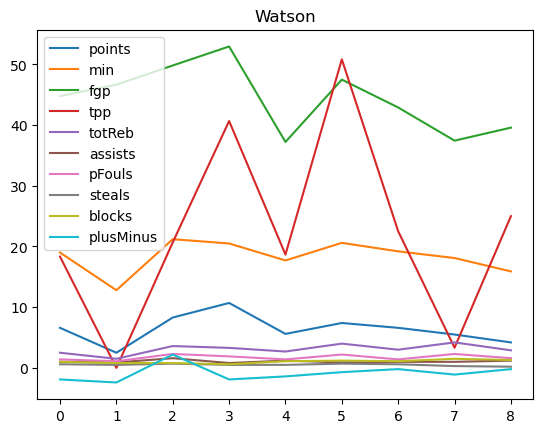

In [72]:
#group nuggets players stats into bins
braun_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
braun_groups = braun_groups.rename(columns={'index':'games'})
braun_groups.plot(legend='plusMinus',title='Braun')
display(braun_groups)

pope_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
pope_groups = pope_groups.rename(columns={'index':'games'})
pope_groups.plot(title='Caldwell-Pope')
display(pope_groups)

gordon_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gordon_groups = gordon_groups.rename(columns={'index':'games'})
gordon_groups.plot(legend='plusMinus',title='Gordon')
display(gordon_groups)

holiday_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
holiday_groups = holiday_groups.rename(columns={'index':'games'})
holiday_groups.plot(title='Holiday')
display(holiday_groups)

jokic_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
jokic_groups = jokic_groups.rename(columns={'index':'games'})
jokic_groups.plot(title='jokic')
display(jokic_groups)

murray_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
murray_groups = murray_groups.rename(columns={'index':'games'})
murray_groups.plot(title='Murray')
display(murray_groups)

porterjr_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
porterjr_groups = porterjr_groups.rename(columns={'index':'games'})
porterjr_groups.plot(title='Porter jr')
display(porterjr_groups)

watson_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
watson_groups = watson_groups.rename(columns={'index':'games'})
watson_groups.plot(title='Watson')
display(watson_groups)

,games,plusMinus
0,"(0, 10]",0.20
1,"(10, 20]",-0.20
2,"(20, 30]",-4.10
3,"(30, 40]",-3.00
4,"(40, 50]",-1.50
5,"(50, 60]",-1.30
6,"(60, 70]",3.10
7,"(70, 80]",5.90
8,"(80, 90]",-0.25


,games,plusMinus
0,"(0, 10]",0.20
1,"(10, 20]",-0.20
2,"(20, 30]",-4.10
3,"(30, 40]",-3.00
4,"(40, 50]",-1.50
5,"(50, 60]",-1.30
6,"(60, 70]",3.10
7,"(70, 80]",5.90
8,"(80, 90]",-0.25


,games,plusMinus
0,"(0, 10]",9.700000
1,"(10, 20]",-0.500000
2,"(20, 30]",8.300000
3,"(30, 40]",6.100000
4,"(40, 50]",0.100000
5,"(50, 60]",8.600000
6,"(60, 70]",5.300000
7,"(70, 80]",7.800000
8,"(80, 90]",-17.666667


,games,plusMinus
0,"(0, 10]",-0.6
1,"(10, 20]",6.5
2,"(20, 30]",-2.5
3,"(30, 40]",-4.7
4,"(40, 50]",2.3
5,"(50, 60]",3.9
6,"(60, 70]",0.0
7,"(70, 80]",NaN
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",10.3
1,"(10, 20]",2.5
2,"(20, 30]",9.1
3,"(30, 40]",12.6
4,"(40, 50]",2.0
5,"(50, 60]",10.2
6,"(60, 70]",7.8
7,"(70, 80]",13.8
8,"(80, 90]",1.0


,games,plusMinus
0,"(0, 10]",2.300000
1,"(10, 20]",9.500000
2,"(20, 30]",4.600000
3,"(30, 40]",1.600000
4,"(40, 50]",3.600000
5,"(50, 60]",8.400000
6,"(60, 70]",-0.111111
7,"(70, 80]",NaN
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",7.800000
1,"(10, 20]",-0.300000
2,"(20, 30]",9.300000
3,"(30, 40]",12.300000
4,"(40, 50]",-0.800000
5,"(50, 60]",4.700000
6,"(60, 70]",6.200000
7,"(70, 80]",6.600000
8,"(80, 90]",-0.857143


,games,plusMinus
0,"(0, 10]",-1.9
1,"(10, 20]",-2.4
2,"(20, 30]",2.2
3,"(30, 40]",-1.9
4,"(40, 50]",-1.4
5,"(50, 60]",-0.7
6,"(60, 70]",-0.2
7,"(70, 80]",-1.1
8,"(80, 90]",-0.2


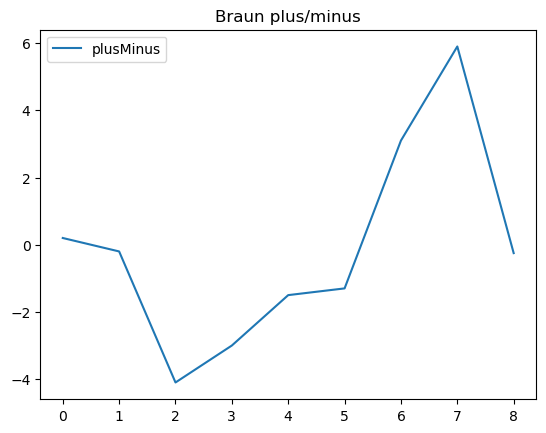

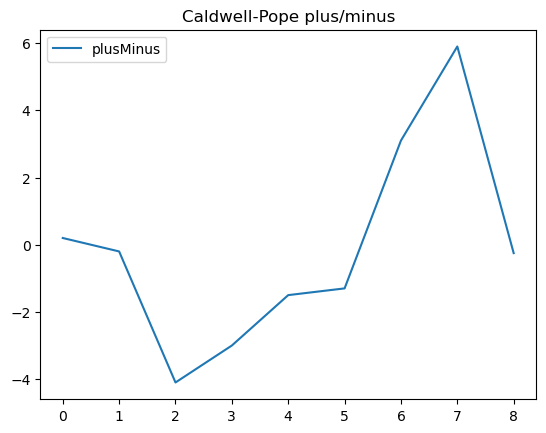

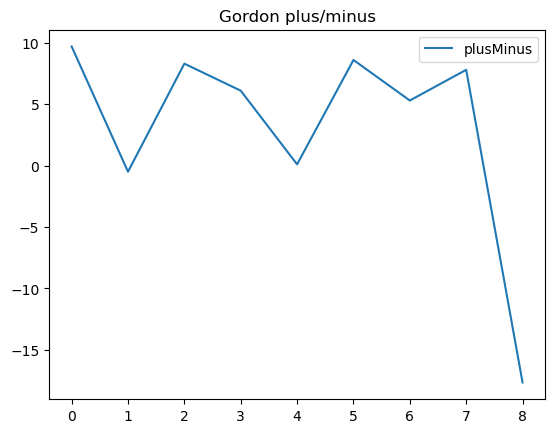

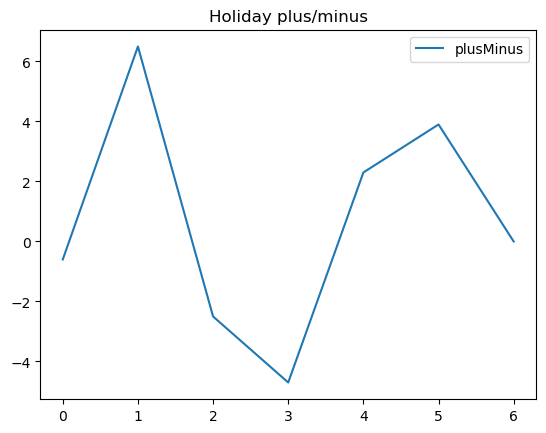

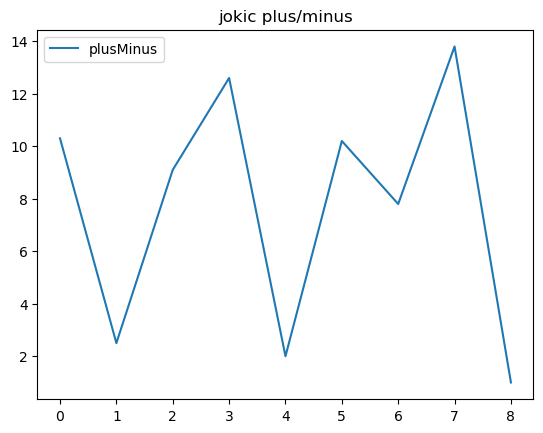

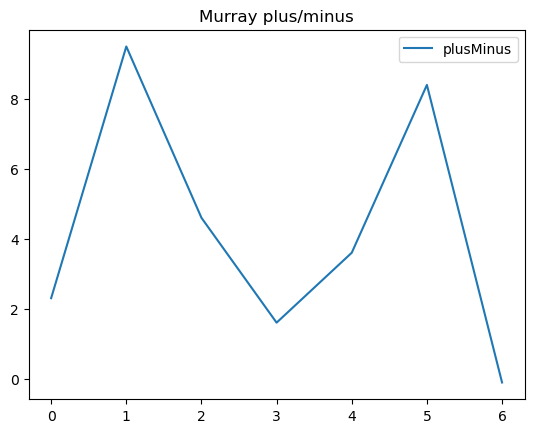

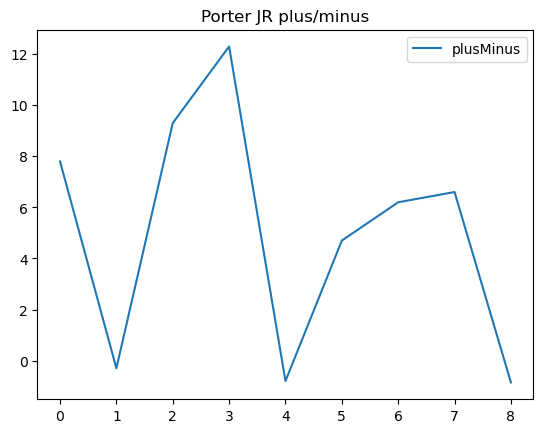

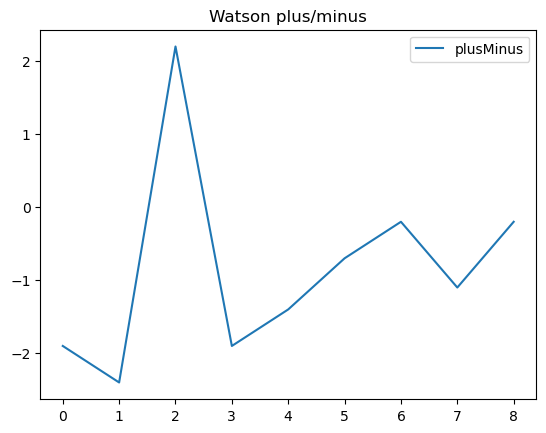

In [73]:
#get and plot nuggets players plusMinus splits
braun_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
braun_plusMinus_groups = braun_plusMinus_groups.rename(columns={'index':'games'})
braun_plusMinus_groups.plot(legend='plusMinus',title='Braun plus/minus')
display(braun_plusMinus_groups)

pope_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
pope_plusMinus_groups = pope_plusMinus_groups.rename(columns={'index':'games'})
pope_plusMinus_groups.plot(title='Caldwell-Pope plus/minus')
display(pope_plusMinus_groups)

gordon_plusMinus_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gordon_plusMinus_groups = gordon_plusMinus_groups.rename(columns={'index':'games'})
gordon_plusMinus_groups.plot(legend='plusMinus',title='Gordon plus/minus')
display(gordon_plusMinus_groups)

holiday_plusMinus_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
holiday_plusMinus_groups = holiday_plusMinus_groups.rename(columns={'index':'games'})
holiday_plusMinus_groups.plot(legend='plusMinus',title='Holiday plus/minus')
display(holiday_plusMinus_groups)

jokic_plusMinus_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
jokic_plusMinus_groups = jokic_plusMinus_groups.rename(columns={'index':'games'})
jokic_plusMinus_groups.plot(legend='plusMinus',title='jokic plus/minus')
display(jokic_plusMinus_groups)

murray_plusMinus_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
murray_plusMinus_groups = murray_plusMinus_groups.rename(columns={'index':'games'})
murray_plusMinus_groups.plot(legend='plusMinus',title='Murray plus/minus')
display(murray_plusMinus_groups)

porterjr_plusMinus_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
porterjr_plusMinus_groups = porterjr_plusMinus_groups.rename(columns={'index':'games'})
porterjr_plusMinus_groups.plot(legend='plusMinus',title='Porter JR plus/minus')
display(porterjr_plusMinus_groups)

watson_plusMinus_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
watson_plusMinus_groups = watson_plusMinus_groups.rename(columns={'index':'games'})
watson_plusMinus_groups.plot(legend='plusMinus',title='Watson plus/minus')
display(watson_plusMinus_groups)

,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",9.900000,28.100000,51.350000,44.16,3.000000,4.800000,2.300000,0.700000,0.100000,3.600000
1,"(10, 20]",10.300000,29.600000,39.860000,42.68,2.500000,7.300000,1.500000,1.100000,0.100000,4.600000
2,"(20, 30]",13.900000,29.100000,53.270000,53.31,2.800000,6.100000,1.100000,1.200000,0.100000,6.800000
3,"(30, 40]",8.800000,28.500000,39.950000,39.43,2.300000,7.100000,1.900000,0.700000,0.300000,8.000000
4,"(40, 50]",9.100000,28.700000,42.030000,42.64,3.400000,6.900000,1.900000,1.300000,0.600000,3.200000
5,"(50, 60]",10.200000,28.300000,38.980000,32.50,3.400000,4.500000,1.200000,1.200000,0.000000,-1.600000
6,"(60, 70]",16.000000,29.000000,50.740000,43.51,2.200000,5.300000,2.100000,1.600000,0.300000,2.300000
7,"(70, 80]",12.700000,29.000000,44.450000,44.57,3.300000,5.000000,2.100000,1.300000,0.200000,1.000000
8,"(80, 90]",9.333333,32.333333,40.833333,36.10,3.666667,7.666667,2.666667,1.333333,0.333333,18.666667


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",25.900000,33.200000,49.980000,41.290000,6.300000,4.500000,1.800000,1.000000,0.400000,11.300000
1,"(10, 20]",24.000000,34.900000,41.230000,35.390000,5.700000,4.900000,1.900000,1.300000,0.600000,6.000000
2,"(20, 30]",26.600000,33.600000,40.870000,30.330000,4.400000,5.400000,1.700000,1.600000,0.800000,4.300000
3,"(30, 40]",26.200000,34.900000,48.050000,34.570000,5.300000,4.600000,1.900000,1.000000,0.500000,6.500000
4,"(40, 50]",25.000000,36.600000,48.430000,44.680000,4.800000,5.600000,2.400000,0.800000,0.200000,5.000000
5,"(50, 60]",28.700000,34.000000,45.100000,32.500000,5.100000,4.700000,1.300000,1.600000,0.600000,10.600000
6,"(60, 70]",27.000000,37.700000,45.320000,40.730000,7.400000,5.700000,1.700000,1.300000,1.000000,0.800000
7,"(70, 80]",23.800000,33.800000,41.680000,21.700000,4.700000,5.000000,1.300000,1.400000,0.100000,1.500000
8,"(80, 90]",29.571429,38.857143,51.171429,32.142857,6.714286,5.571429,2.428571,1.714286,0.857143,9.571429


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",11.400000,30.600000,60.780000,0.0,12.000000,1.100000,2.500000,0.8,1.500000,6.500000
1,"(10, 20]",12.600000,32.000000,61.690000,0.0,10.400000,1.200000,3.100000,0.5,2.700000,2.600000
2,"(20, 30]",13.200000,32.000000,67.310000,0.0,13.400000,1.600000,2.900000,1.0,2.200000,9.600000
3,"(30, 40]",14.000000,33.300000,69.510000,0.0,12.500000,0.600000,2.700000,0.6,1.600000,4.900000
4,"(40, 50]",15.500000,35.700000,67.760000,0.0,13.100000,1.500000,3.400000,0.3,1.900000,5.500000
5,"(50, 60]",13.800000,35.200000,67.050000,0.0,13.700000,1.400000,3.400000,0.4,2.300000,6.400000
6,"(60, 70]",14.700000,37.000000,72.140000,0.0,13.700000,1.700000,3.700000,0.8,2.200000,5.900000
7,"(70, 80]",15.500000,35.000000,67.710000,0.0,13.300000,1.800000,3.100000,1.3,1.900000,2.900000
8,"(80, 90]",11.333333,32.666667,52.766667,0.0,10.666667,1.666667,3.333333,1.0,1.666667,14.333333


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",19.000000,32.000000,45.910000,39.050000,8.900000,2.400000,3.1,0.800000,0.600000,5.700000
1,"(10, 20]",24.800000,34.300000,55.860000,51.210000,8.700000,3.800000,3.8,1.000000,0.800000,6.700000
2,"(20, 30]",20.400000,31.900000,52.640000,39.160000,9.900000,2.600000,3.2,0.600000,0.300000,4.000000
3,"(30, 40]",22.600000,32.900000,54.730000,52.190000,7.500000,3.500000,3.5,0.700000,0.300000,4.900000
4,"(40, 50]",25.100000,33.900000,51.160000,42.200000,7.900000,2.700000,2.9,0.300000,1.000000,2.600000
5,"(50, 60]",21.200000,32.400000,46.010000,38.530000,7.600000,3.100000,3.3,0.900000,0.800000,9.800000
6,"(60, 70]",17.666667,28.777778,50.088889,39.266667,7.666667,2.777778,4.0,0.333333,0.555556,2.555556
7,"(70, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",9.300000,23.700000,56.340000,23.440000,2.100000,1.200000,3.400000,0.600000,0.300000,5.4
1,"(10, 20]",11.900000,30.100000,50.230000,35.000000,2.400000,1.000000,3.800000,1.000000,1.100000,0.4
2,"(20, 30]",11.400000,31.700000,47.830000,41.000000,2.900000,1.500000,2.200000,1.100000,0.300000,5.2
3,"(30, 40]",10.600000,31.400000,46.760000,38.680000,3.300000,1.800000,3.300000,1.000000,0.100000,4.5
4,"(40, 50]",9.100000,29.100000,45.350000,27.140000,2.900000,1.200000,2.900000,0.800000,1.100000,3.4
5,"(50, 60]",10.900000,30.200000,41.680000,29.500000,5.000000,1.300000,3.500000,0.900000,0.600000,-2.5
6,"(60, 70]",10.700000,29.100000,50.170000,21.790000,3.500000,1.800000,2.500000,0.900000,0.600000,1.1
7,"(70, 80]",9.714286,33.714286,33.414286,14.285714,4.428571,1.285714,3.142857,0.714286,0.714286,11.0
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",4.700000,13.000000,31.250000,18.33,1.500000,1.700000,0.300000,0.500000,0.300000,1.500000
1,"(10, 20]",5.200000,16.600000,50.860000,40.00,1.300000,2.900000,0.300000,0.600000,0.000000,0.400000
2,"(20, 30]",5.800000,15.600000,43.080000,41.00,2.400000,1.600000,0.800000,0.800000,0.500000,6.000000
3,"(30, 40]",1.142857,7.571429,15.471429,0.00,0.714286,1.142857,0.571429,0.142857,0.285714,-0.428571
4,"(40, 50]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"(50, 60]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"(60, 70]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"(70, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",14.600000,22.200000,55.480000,39.74,4.300000,1.000000,1.100000,0.900000,0.500000,6.400000
1,"(10, 20]",10.600000,20.000000,48.480000,39.00,3.700000,0.500000,2.100000,0.700000,0.700000,-2.000000
2,"(20, 30]",14.900000,24.100000,48.990000,33.08,5.300000,1.700000,2.200000,0.800000,0.500000,1.800000
3,"(30, 40]",12.600000,23.900000,52.550000,43.29,6.300000,1.300000,2.700000,0.400000,0.800000,3.300000
4,"(40, 50]",10.400000,21.500000,41.110000,47.33,3.300000,1.100000,1.900000,1.000000,1.100000,7.900000
5,"(50, 60]",11.600000,24.500000,49.420000,40.83,5.100000,0.800000,2.200000,0.600000,1.000000,7.100000
6,"(60, 70]",16.900000,28.000000,46.750000,40.84,6.800000,2.200000,2.100000,0.600000,1.500000,2.200000
7,"(70, 80]",17.000000,28.500000,44.290000,42.33,7.100000,1.900000,2.300000,1.300000,1.100000,1.700000
8,"(80, 90]",12.222222,22.666667,43.433333,33.70,3.333333,1.333333,2.222222,0.666667,0.777778,1.888889


,games,points,min,fgp,tpp,totReb,assists,pFouls,steals,blocks,plusMinus
0,"(0, 10]",4.3,19.5,29.21,29.22,2.0,2.6,1.9,0.8,0.7,-2.3
1,"(10, 20]",8.9,26.3,44.60,38.86,2.1,2.5,2.4,1.2,0.7,3.8
2,"(20, 30]",6.9,23.0,41.55,28.67,1.4,1.9,1.7,0.6,0.4,2.3
3,"(30, 40]",5.5,20.3,43.24,36.83,1.5,2.4,1.7,1.1,0.5,-0.1
4,"(40, 50]",8.5,25.6,47.66,41.35,1.9,3.3,2.1,0.7,0.3,4.2
5,"(50, 60]",7.8,22.9,36.28,38.66,3.0,2.4,1.8,0.5,0.3,8.9
6,"(60, 70]",11.8,27.2,49.55,45.83,2.7,2.7,1.3,0.9,0.8,5.1
7,"(70, 80]",8.6,22.6,46.34,43.29,1.7,1.8,1.6,0.3,0.2,5.9
8,"(80, 90]",11.1,26.8,40.82,38.92,2.3,2.7,2.0,1.2,0.6,6.9


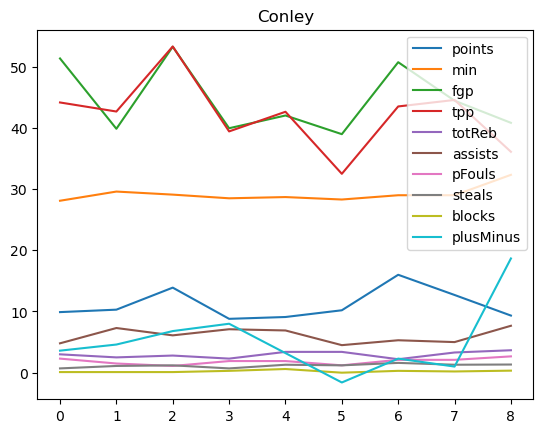

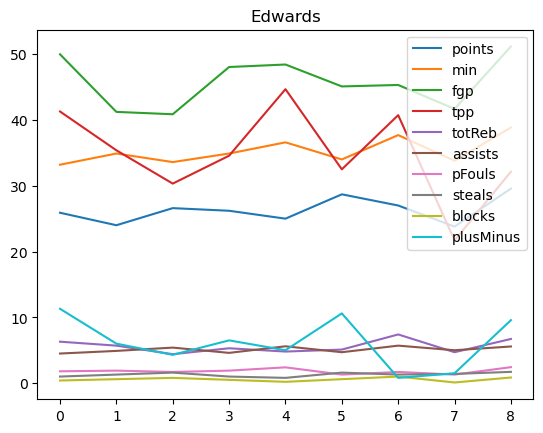

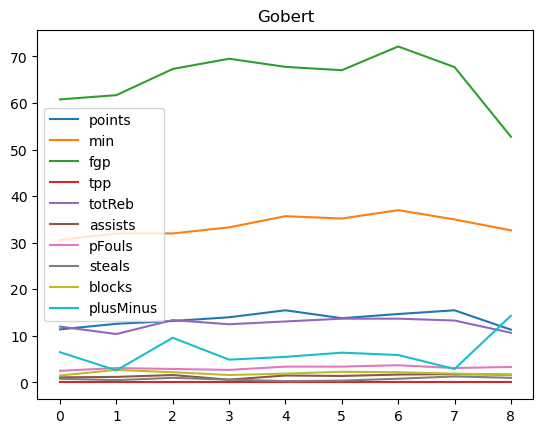

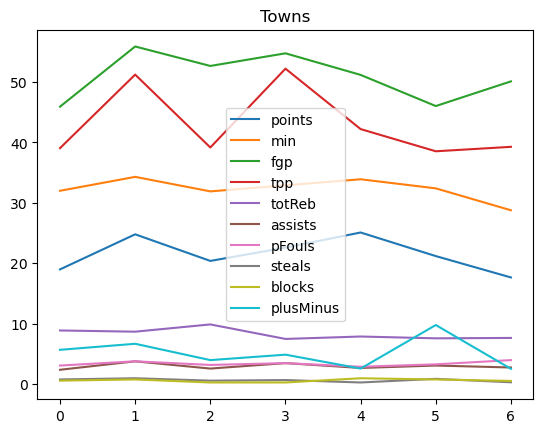

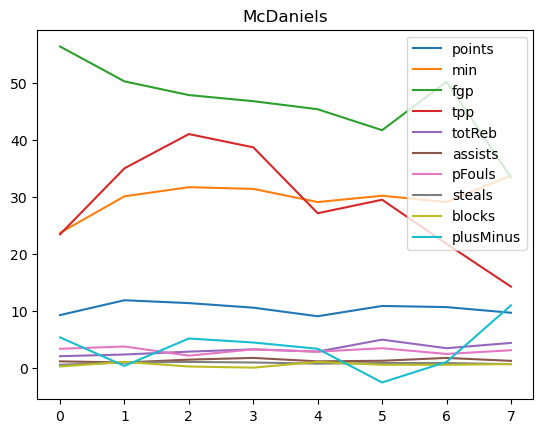

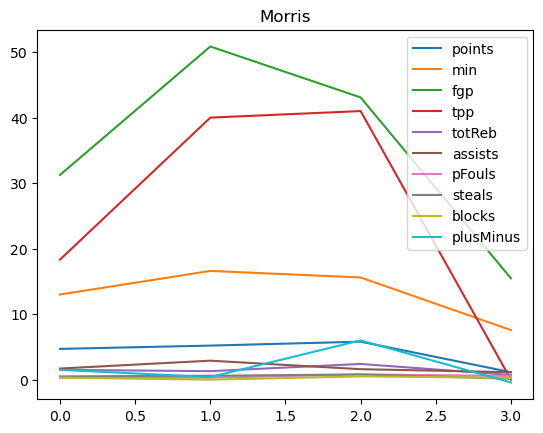

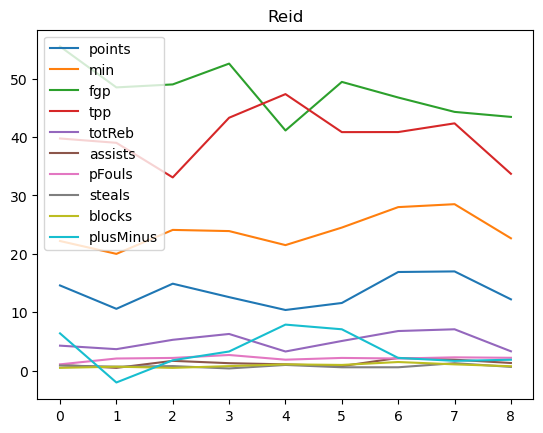

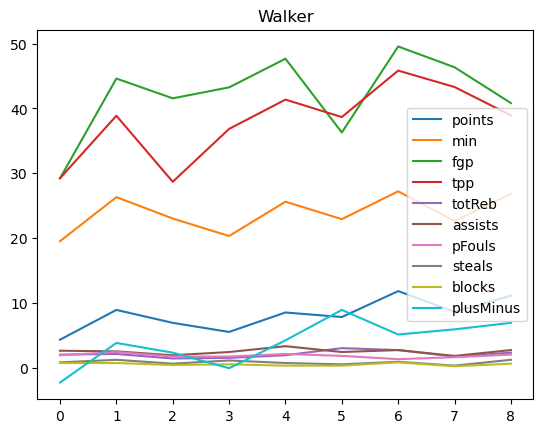

In [74]:
#get timberwolves player stat splits based on bins
conley_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
conley_groups = conley_groups.rename(columns={'index':'games'})
conley_groups.plot(title='Conley')
display(conley_groups)

edwards_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
edwards_groups = edwards_groups.rename(columns={'index':'games'})
edwards_groups.plot(title='Edwards')
display(edwards_groups)

gobert_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gobert_groups = gobert_groups.rename(columns={'index':'games'})
gobert_groups.plot(title='Gobert')
display(gobert_groups)

kat_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
kat_groups = kat_groups.rename(columns={'index':'games'})
kat_groups.plot(title='Towns')
display(kat_groups)

mcdaniels_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
mcdaniels_groups = mcdaniels_groups.rename(columns={'index':'games'})
mcdaniels_groups.plot(title='McDaniels')
display(mcdaniels_groups)

morris_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
morris_groups = morris_groups.rename(columns={'index':'games'})
morris_groups.plot(title='Morris')
display(morris_groups)

reid_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
reid_groups = reid_groups.rename(columns={'index':'games'})
reid_groups.plot(title='Reid')
display(reid_groups)

walker_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
walker_groups = walker_groups.rename(columns={'index':'games'})
walker_groups.plot(title='Walker')
display(walker_groups)

,games,plusMinus
0,"(0, 10]",3.600000
1,"(10, 20]",4.600000
2,"(20, 30]",6.800000
3,"(30, 40]",8.000000
4,"(40, 50]",3.200000
5,"(50, 60]",-1.600000
6,"(60, 70]",2.300000
7,"(70, 80]",1.000000
8,"(80, 90]",18.666667


,games,plusMinus
0,"(0, 10]",11.300000
1,"(10, 20]",6.000000
2,"(20, 30]",4.300000
3,"(30, 40]",6.500000
4,"(40, 50]",5.000000
5,"(50, 60]",10.600000
6,"(60, 70]",0.800000
7,"(70, 80]",1.500000
8,"(80, 90]",9.571429


,games,plusMinus
0,"(0, 10]",6.500000
1,"(10, 20]",2.600000
2,"(20, 30]",9.600000
3,"(30, 40]",4.900000
4,"(40, 50]",5.500000
5,"(50, 60]",6.400000
6,"(60, 70]",5.900000
7,"(70, 80]",2.900000
8,"(80, 90]",14.333333


,games,plusMinus
0,"(0, 10]",5.700000
1,"(10, 20]",6.700000
2,"(20, 30]",4.000000
3,"(30, 40]",4.900000
4,"(40, 50]",2.600000
5,"(50, 60]",9.800000
6,"(60, 70]",2.555556
7,"(70, 80]",NaN
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",5.4
1,"(10, 20]",0.4
2,"(20, 30]",5.2
3,"(30, 40]",4.5
4,"(40, 50]",3.4
5,"(50, 60]",-2.5
6,"(60, 70]",1.1
7,"(70, 80]",11.0
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",1.500000
1,"(10, 20]",0.400000
2,"(20, 30]",6.000000
3,"(30, 40]",-0.428571
4,"(40, 50]",NaN
5,"(50, 60]",NaN
6,"(60, 70]",NaN
7,"(70, 80]",NaN
8,"(80, 90]",NaN


,games,plusMinus
0,"(0, 10]",6.400000
1,"(10, 20]",-2.000000
2,"(20, 30]",1.800000
3,"(30, 40]",3.300000
4,"(40, 50]",7.900000
5,"(50, 60]",7.100000
6,"(60, 70]",2.200000
7,"(70, 80]",1.700000
8,"(80, 90]",1.888889


,games,plusMinus
0,"(0, 10]",-2.3
1,"(10, 20]",3.8
2,"(20, 30]",2.3
3,"(30, 40]",-0.1
4,"(40, 50]",4.2
5,"(50, 60]",8.9
6,"(60, 70]",5.1
7,"(70, 80]",5.9
8,"(80, 90]",6.9


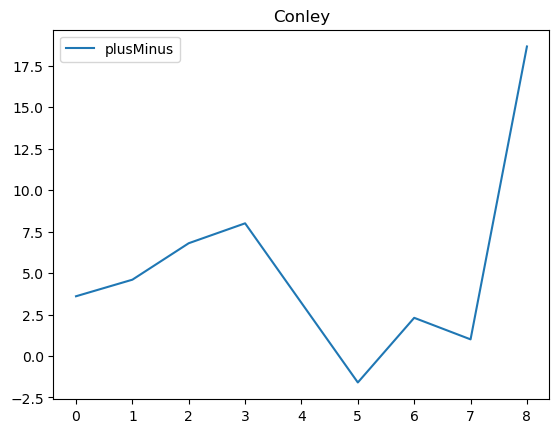

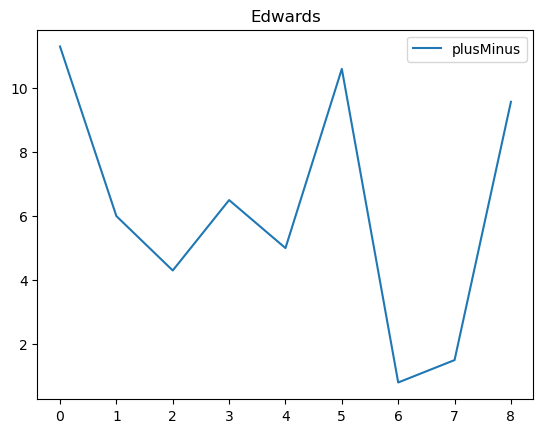

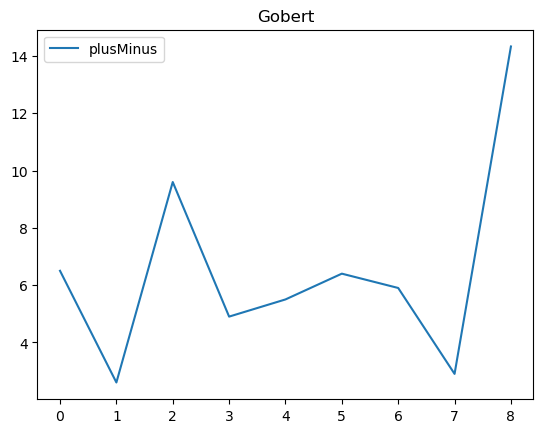

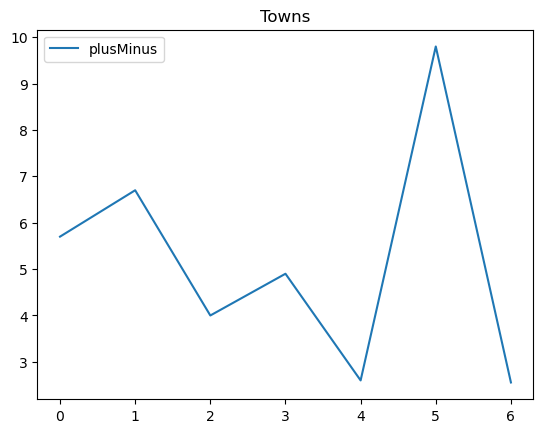

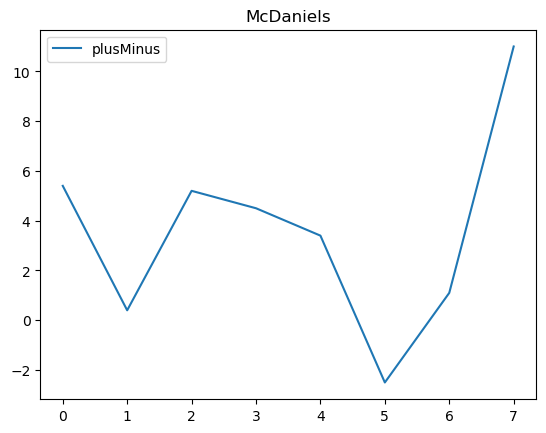

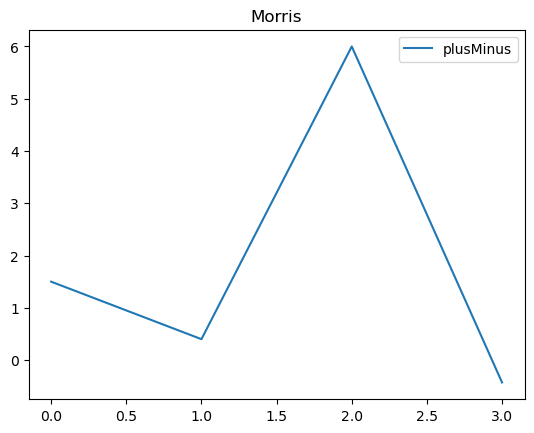

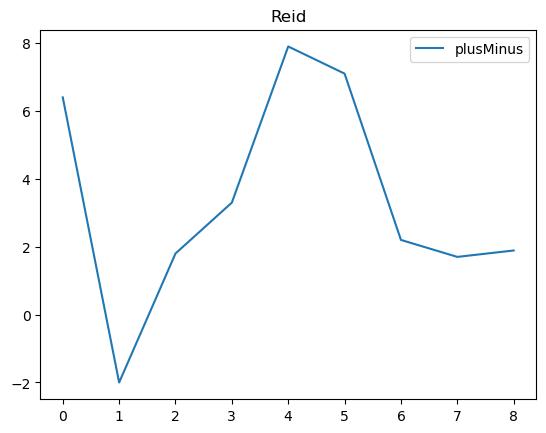

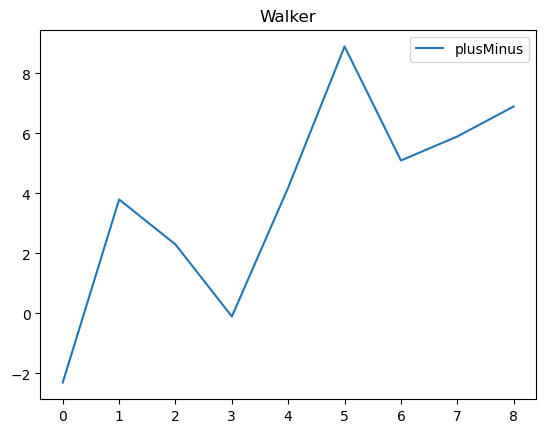

In [75]:
#get timberwolves players plus minus stat splits
conley_plusMinus_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
conley_plusMinus_groups = conley_plusMinus_groups.rename(columns={'index':'games'})
conley_plusMinus_groups.plot(legend='plusMinus',title='Conley')
display(conley_plusMinus_groups)

edwards_plusMinus_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
edwards_plusMinus_groups = edwards_plusMinus_groups.rename(columns={'index':'games'})
edwards_plusMinus_groups.plot(legend='plusMinus',title='Edwards')
display(edwards_plusMinus_groups)

gobert_plusMinus_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gobert_plusMinus_groups = gobert_plusMinus_groups.rename(columns={'index':'games'})
gobert_plusMinus_groups.plot(legend='plusMinus',title='Gobert')
display(gobert_plusMinus_groups)

kat_plusMinus_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
kat_plusMinus_groups = kat_plusMinus_groups.rename(columns={'index':'games'})
kat_plusMinus_groups.plot(legend='plusMinus',title='Towns')
display(kat_plusMinus_groups)

mcdaniels_plusMinus_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
mcdaniels_plusMinus_groups = mcdaniels_plusMinus_groups.rename(columns={'index':'games'})
mcdaniels_plusMinus_groups.plot(legend='plusMinus',title='McDaniels')
display(mcdaniels_plusMinus_groups)

morris_plusMinus_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
morris_plusMinus_groups = morris_plusMinus_groups.rename(columns={'index':'games'})
morris_plusMinus_groups.plot(legend='plusMinus',title='Morris')
display(morris_plusMinus_groups)

reid_plusMinus_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
reid_plusMinus_groups = reid_plusMinus_groups.rename(columns={'index':'games'})
reid_plusMinus_groups.plot(legend='plusMinus',title='Reid')
display(reid_plusMinus_groups)

walker_plusMinus_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
walker_plusMinus_groups = walker_plusMinus_groups.rename(columns={'index':'games'})
walker_plusMinus_groups.plot(legend='plusMinus',title='Walker')
display(walker_plusMinus_groups)

In [76]:
braun_points = braun_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
braun_info = {'Braun':'G'}
display(braun_info)
display(braun_points)

{'Braun': 'G'}

points        7.056180
min          19.685393
fgp          42.520225
tpp          29.398876
totReb        3.606742
assists       1.505618
pFouls        1.629213
steals        0.483146
blocks        0.415730
plusMinus    -0.067416
dtype: float64

{'Caldwell-Pope': 'F'}

<Axes: >

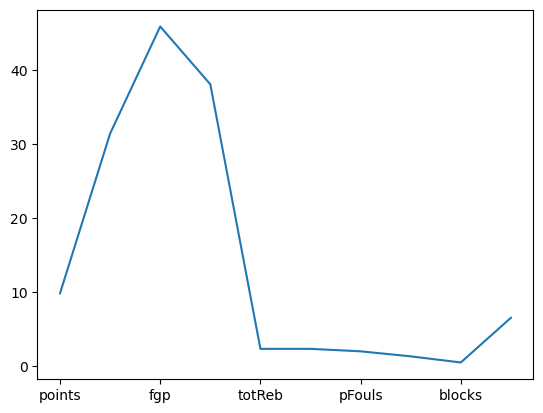

In [77]:
pope_points = pope_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
caldwellpope = {'Caldwell-Pope' : 'F'}
display(caldwellpope)
pope_points.plot()

In [78]:
gordon_points = gordon_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gordon = {'Gordon':'G'}
display(gordon)
gordon_points

{'Gordon': 'G'}

points       13.607143
min          31.500000
fgp          56.733333
tpp          20.057143
totReb        6.476190
assists       3.559524
pFouls        1.916667
steals        0.750000
blocks        0.583333
plusMinus     4.845238
dtype: float64

In [79]:
holiday_points = holiday_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
holiday_points

points        3.928571
min          14.842857
fgp          34.772857
tpp          28.310000
totReb        1.271429
assists       1.100000
pFouls        1.171429
steals        0.657143
blocks        0.157143
plusMinus     0.771429
dtype: float64

In [80]:
jokic_points = jokic_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
jokic_points

points       26.000000
min          34.500000
fgp          59.700000
tpp          33.940000
totReb       12.377778
assists       8.811111
pFouls        2.488889
steals        1.366667
blocks        0.800000
plusMinus     7.700000
dtype: float64

In [81]:
murray_points = murray_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
murray_points

points       20.571429
min          31.700000
fgp          46.188571
tpp          39.200000
totReb        4.100000
assists       6.400000
pFouls        1.757143
steals        0.942857
blocks        0.657143
plusMinus     4.442857
dtype: float64

In [82]:
porterjr_points = porterjr_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
porterjr_points

points       17.034091
min          32.306818
fgp          48.298864
tpp          39.506818
totReb        7.022727
assists       1.488636
pFouls        1.784091
steals        0.590909
blocks        0.647727
plusMinus     5.272727
dtype: float64

In [83]:
watson_points = watson_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
watson_points

points        6.347826
min          18.250000
fgp          44.167391
tpp          22.464130
totReb        3.065217
assists       1.043478
pFouls        1.760870
steals        0.510870
blocks        1.043478
plusMinus    -0.978261
dtype: float64

In [84]:
conley_points = conley_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
conley_points

points       11.202381
min          28.654762
fgp          45.580952
tpp          43.289286
totReb        2.880952
assists       5.880952
pFouls        1.773810
steals        1.130952
blocks        0.214286
plusMinus     4.047619
dtype: float64

In [85]:
edwards_points = edwards_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
edwards_points

points       26.045455
min          34.954545
fgp          45.559091
tpp          35.268182
totReb        5.522727
assists       5.068182
pFouls        1.795455
steals        1.272727
blocks        0.556818
plusMinus     6.022727
dtype: float64

In [86]:
gobert_points = gobert_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gobert_points

points       13.666667
min          33.607143
fgp          66.640476
tpp           0.000000
totReb       12.595238
assists       1.357143
pFouls        3.071429
steals        0.714286
blocks        2.011905
plusMinus     5.976190
dtype: float64

In [87]:
kat_points = kat_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
kat_points

points       21.485714
min          32.157143
fgp          50.832857
tpp          43.001429
totReb        8.242857
assists       2.971429
pFouls        3.385714
steals        0.685714
blocks        0.628571
plusMinus     5.171429
dtype: float64

In [88]:
mcdaniels_points = mcdaniels_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
mcdaniels_points

points       10.500000
min          29.653846
fgp          47.446154
tpp          30.326923
totReb        3.269231
assists       1.397436
pFouls        3.076923
steals        0.871795
blocks        0.602564
plusMinus     3.128205
dtype: float64

In [89]:
morris_points = morris_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
morris_points

points        4.526316
min          13.578947
fgp          37.768421
tpp          28.771053
totReb        1.578947
assists       1.921053
pFouls        0.473684
steals        0.526316
blocks        0.263158
plusMinus     2.078947
dtype: float64

In [90]:
reid_points = reid_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
reid_points

points       13.444444
min          23.855556
fgp          48.184444
tpp          40.752222
totReb        5.022222
assists       1.311111
pFouls        2.077778
steals        0.777778
blocks        0.877778
plusMinus     3.444444
dtype: float64

In [91]:
walker_points = walker_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
walker_points

points        8.131868
min          23.714286
fgp          42.041758
tpp          38.091209
totReb        2.065934
assists       2.450549
pFouls        1.846154
steals        0.813187
blocks        0.505495
plusMinus     3.780220
dtype: float64